In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipykernel
import sklearn

print("Numpy Version: ",np.__version__)
print("Pandas Version: ",pd.__version__)
print("Matplotlib Version: ",matplotlib.__version__)
print("Sklearn Version: ",sklearn.__version__)
print("ipykernel Version: ",ipykernel.__version__)

Numpy Version:  2.0.2
Pandas Version:  2.3.3
Matplotlib Version:  3.9.4
Sklearn Version:  1.6.1
ipykernel Version:  6.31.0


# 📘 Overfitting vs Underfitting — Complete Understanding

Machine Learning models must **generalize** well to unseen data.

Two common problems occur:

---

## 🔴 Underfitting
- Model is **too simple**
- Cannot capture important patterns
- High training error
- High test error

Example:
- Fitting a **straight line** to curved data.

---

## 🔵 Overfitting
- Model is **too complex**
- Memorizes the training data
- Very low training error
- High test error

Example:
- Fitting a **high-degree polynomial** that bends too much.

---

## 🟢 Ideal Model
- Balanced complexity
- Good performance on training AND test data
- Neither too simple nor too complex

---

In this notebook, we will:
1. Visualize underfitting & overfitting  
2. Train models and compare errors  
3. Understand the Bias–Variance Tradeoff  


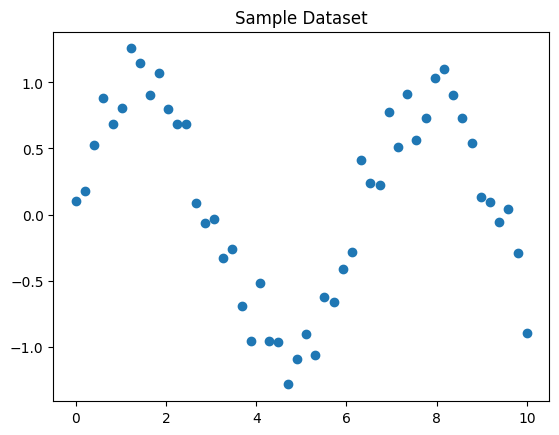

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create nonlinear dataset
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = np.sin(X) + np.random.normal(0, 0.2, 50)

plt.scatter(X, y)
plt.title("Sample Dataset")
plt.show()


# 🔴 Underfitting Example

We use **Linear Regression** (too simple for sine wave).

Expected:
- High training error  
- High test error  


Train MSE: 0.4801112208805554
Test MSE: 0.5770033585253393


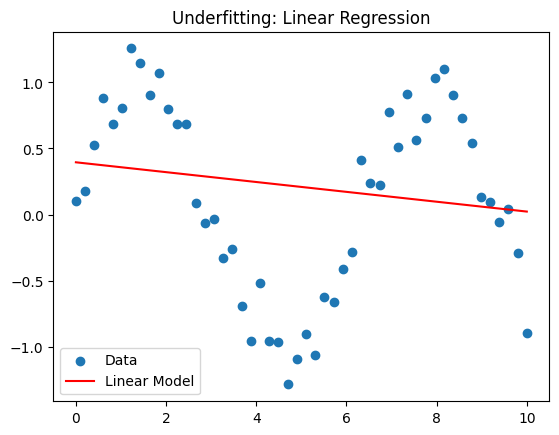

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

# Train linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Errors
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

# Plot
plt.scatter(X, y, label="Data")
plt.plot(X, lin_reg.predict(X.reshape(-1,1)), color="red", label="Linear Model")
plt.title("Underfitting: Linear Regression")
plt.legend()
plt.show()


# 🔵 Overfitting Example

We fit a **15-degree polynomial**, which is too complex.

Expected:
- Very low training error  
- Very high test error  


Train MSE (Overfit): 0.0568904446023073
Test MSE (Overfit): 0.04435374341624404


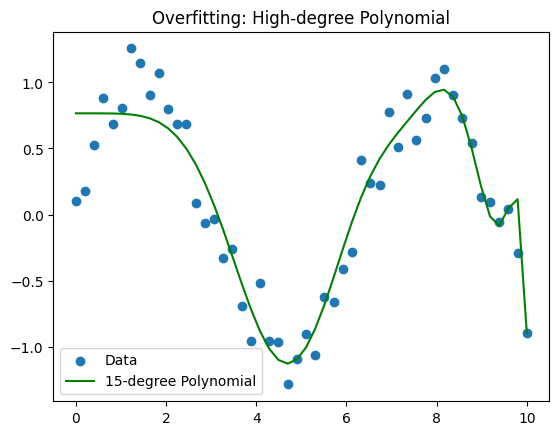

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# high-degree polynomial (overfitting)
poly_overfit = make_pipeline(PolynomialFeatures(15), LinearRegression())
poly_overfit.fit(X_train, y_train)

y_pred_train_over = poly_overfit.predict(X_train)
y_pred_test_over = poly_overfit.predict(X_test)

print("Train MSE (Overfit):", mean_squared_error(y_train, y_pred_train_over))
print("Test MSE (Overfit):", mean_squared_error(y_test, y_pred_test_over))

# Plot
plt.scatter(X, y, label="Data")
plt.plot(X, poly_overfit.predict(X.reshape(-1,1)), color="green", label="15-degree Polynomial")
plt.title("Overfitting: High-degree Polynomial")
plt.legend()
plt.show()


# 🟢 Good Fit Example

We fit a **3-degree polynomial** which is neither too simple nor too complex.

Expected:
- Good training performance  
- Good test performance  
- Best generalization  


Train MSE (Good Fit): 0.38602809369656715
Test MSE (Good Fit): 0.334247322005701


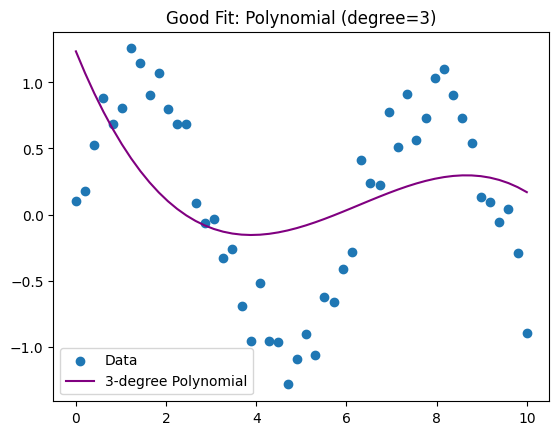

In [5]:
# moderate polynomial degree 3
poly_good = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_good.fit(X_train, y_train)

y_pred_train_good = poly_good.predict(X_train)
y_pred_test_good = poly_good.predict(X_test)

print("Train MSE (Good Fit):", mean_squared_error(y_train, y_pred_train_good))
print("Test MSE (Good Fit):", mean_squared_error(y_test, y_pred_test_good))

# Plot
plt.scatter(X, y, label="Data")
plt.plot(X, poly_good.predict(X.reshape(-1,1)), color="purple", label="3-degree Polynomial")
plt.title("Good Fit: Polynomial (degree=3)")
plt.legend()
plt.show()


# 📘 Bias–Variance Tradeoff — Complete Explanation

Every machine learning model faces two types of errors:

---

# 🔴 **Bias**
- Error from overly simple assumptions  
- Model cannot learn the underlying pattern  
- Causes **Underfitting**

Examples:
- Linear Regression on nonlinear data  
- Using few features  

High Bias → **Simple models**

---

# 🔵 **Variance**
- Error from too much sensitivity to training data  
- Model memorizes noise  
- Causes **Overfitting**

Examples:
- High-degree polynomial  
- Deep decision trees  

High Variance → **Complex models**

---

# 🎯 Goal: Balance Bias and Variance

| Model Type | Bias | Variance |
|-----------|------|----------|
| Underfitting (too simple) | High | Low |
| Overfitting (too complex) | Low | High |
| Good Fit | Moderate | Moderate |

This balance is the **Bias–Variance Tradeoff**.

---

### 💡 Visualization Idea

- Underfit → High Bias, Low Variance 
- Overfit → Low Bias, High Variance 
- Good Fit → Balanced 

# 📘 Practical Example: Model Complexity vs Error

We check training & testing error for different polynomial degrees.


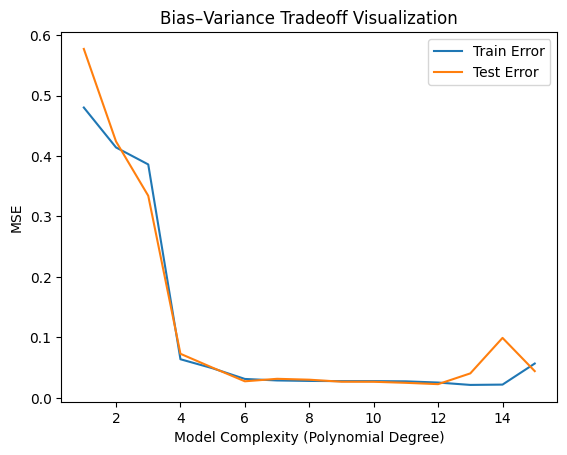

In [6]:
degrees = range(1, 16)
train_errors = []
test_errors = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(degrees, train_errors, label="Train Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("MSE")
plt.title("Bias–Variance Tradeoff Visualization")
plt.legend()
plt.show()


# 🎯 Final Summary — Overfitting, Underfitting, and Bias–Variance Tradeoff

### 🔴 Underfitting
- Model too simple  
- High bias, low variance  
- High training & testing error  

### 🔵 Overfitting
- Model too complex  
- Low bias, high variance  
- Low training error, high testing error  

### 🟢 Good Fit
- Balance of bias & variance  
- Best performance on test set  

### 💡 Key Idea:
> "Increasing model complexity reduces bias but increases variance."

This relationship is the **Bias–Variance Tradeoff**, one of the most important concepts in Machine Learning.
